### 1) importing libraries:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2) Reading and removing missing values:

In [21]:
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [23]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

#### No null values in the dataset 

### 3) shape of the data and meaning of every column : 


In [24]:
boston.shape

(506, 14)

#### 506 rows and 14 columns
##### 1-**crim**: per capita crime rate by town.
##### 2-**zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
##### 3-**indus**: proportion of non-retail business acres per town.
##### 4-**chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
##### 5-**nox**: nitrogen oxides concentration (parts per 10 million).
##### 6-**rm**: average number of rooms per dwelling.
##### 7-**age**: proportion of owner-occupied units built prior to 1940.
##### 8-**dis**: weighted mean of distances to five Boston employment centres.
##### 9-**rad**: index of accessibility to radial highways.
##### 10-**tax**: full-value property-tax rate per $10,000.
##### 11-**ptratio**: pupil-teacher ratio by town.
##### 12-**lstat**: lower status of the population (percent).
##### **medv**: median value of owner-occupied homes in $1000s (our target)

### 4),5) some scatter plots and findings in the data : 

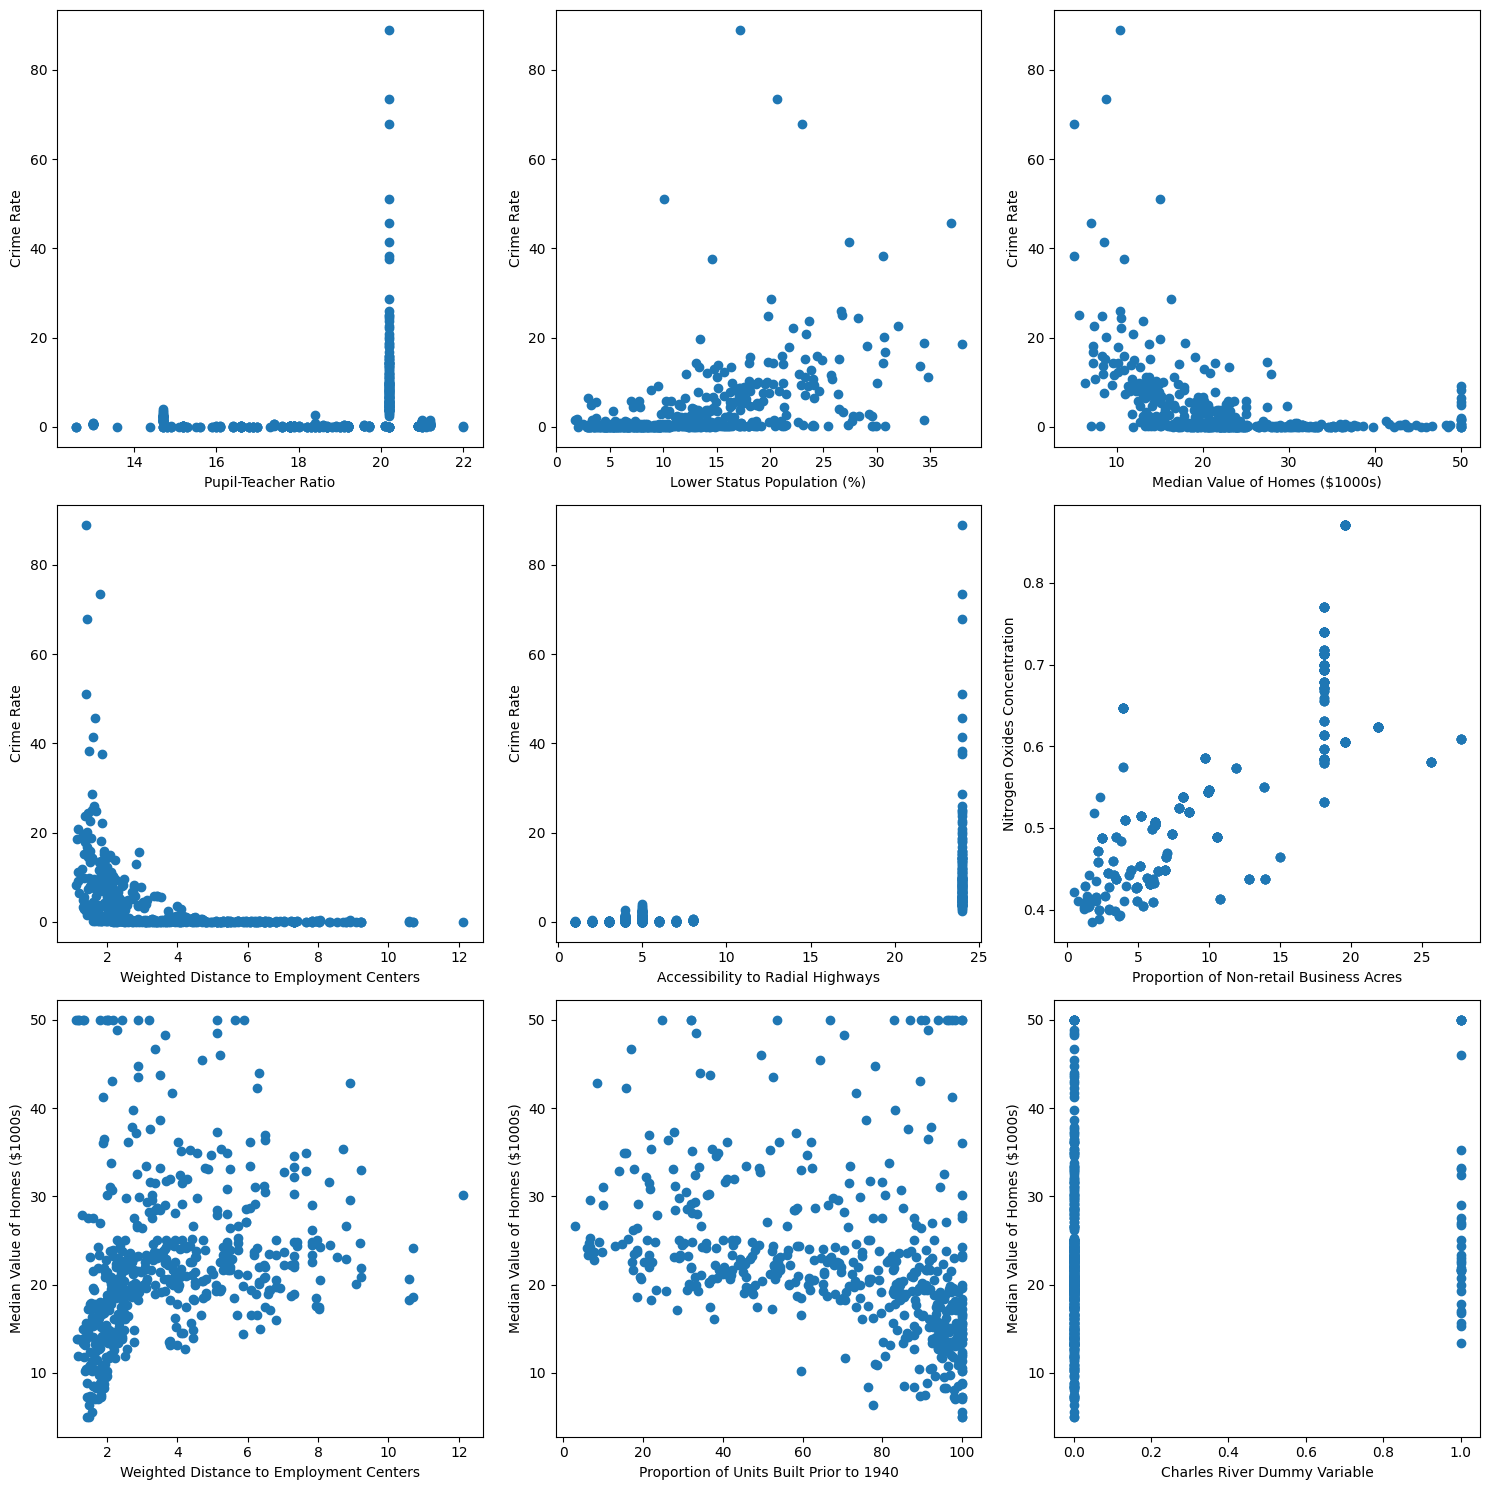

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Scatter plots
ax[0][0].scatter(boston['ptratio'], boston['crim'])
ax[0][1].scatter(boston['lstat'], boston['crim'])
ax[0][2].scatter(boston['medv'], boston['crim'])
ax[1][0].scatter(boston['dis'], boston['crim'])
ax[1][1].scatter(boston['rad'], boston['crim'])
ax[1][2].scatter(boston['indus'], boston['nox'])
ax[2][0].scatter(boston['dis'], boston['medv'])
ax[2][1].scatter(boston['age'], boston['medv'])
ax[2][2].scatter(boston['chas'], boston['medv'])

# Set labels
ax[0][0].set_xlabel('Pupil-Teacher Ratio')
ax[0][0].set_ylabel('Crime Rate')

ax[0][1].set_xlabel('Lower Status Population (%)')
ax[0][1].set_ylabel('Crime Rate')

ax[0][2].set_xlabel('Median Value of Homes ($1000s)')
ax[0][2].set_ylabel('Crime Rate')

ax[1][0].set_xlabel('Weighted Distance to Employment Centers')
ax[1][0].set_ylabel('Crime Rate')

ax[1][1].set_xlabel('Accessibility to Radial Highways')
ax[1][1].set_ylabel('Crime Rate')

ax[1][2].set_xlabel('Proportion of Non-retail Business Acres')
ax[1][2].set_ylabel('Nitrogen Oxides Concentration')

ax[2][0].set_xlabel('Weighted Distance to Employment Centers')
ax[2][0].set_ylabel('Median Value of Homes ($1000s)')

ax[2][1].set_xlabel('Proportion of Units Built Prior to 1940')
ax[2][1].set_ylabel('Median Value of Homes ($1000s)')

ax[2][2].set_xlabel('Charles River Dummy Variable')
ax[2][2].set_ylabel('Median Value of Homes ($1000s)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.savefig('one.png')
plt.show()

##### 1) We can see that there is a spike in crime rate for higher pubil-teacher ratio that's beacuse of worse education.
##### 2) There is a positive relationship between lower-status pobulation percentage and crime rate.
##### 3) We can see an inverse relationship between median value of homes and crime rate.
##### 4) When distance to employment center is lower crime rate tends to be higher, this can be assigned to the crowdedness.
##### 5) Also when closer to radial highways crime rate is higher which makes great sense.
##### 6) Pollution is higher when more industry is in the suburb.
##### 7) There seem to be a positve relationship(but a weak one) between distance to employment centers and median value of homes.
##### 8) We can see no real relationship exists betweenn age of the units and its price.
##### 9) There isn't a real relationship between being by the river or not and the median value of home but we can find cheaper houses not by the river compared to by the river.


### 6) suburbs with high crime rates,tax rates or pupil-teacher ratios :

#### 6.1) crime rates :

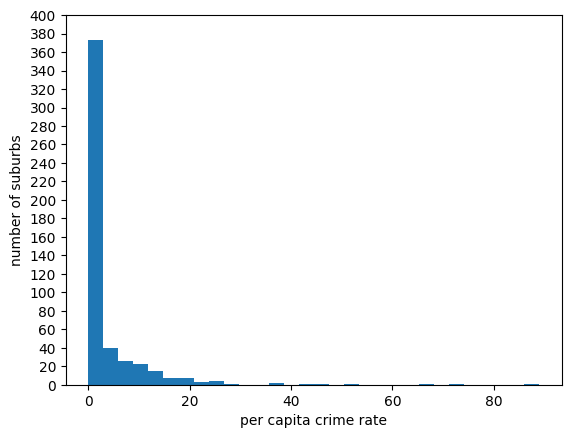

In [54]:
plt.hist(boston['crim'], bins=30)
plt.xlabel('per capita crime rate')
plt.ylabel('number of suburbs')
plt.yticks(np.arange(0,410,20))
plt.show()

In [51]:
Q1 = boston['crim'].quantile(0.25)
Q3 = boston['crim'].quantile(0.75)
IQR = Q3 - Q1
boston[boston['crim']> Q3 + 1.5 * IQR].shape

0.08204499999999999 0.25651 3.6770825 3.5950375


(66, 14)

#### using Interquartile Range Method we can see that there is approximately 66 suburbs out of the 506 have high crime rates.

#### 6.2) tax rates :

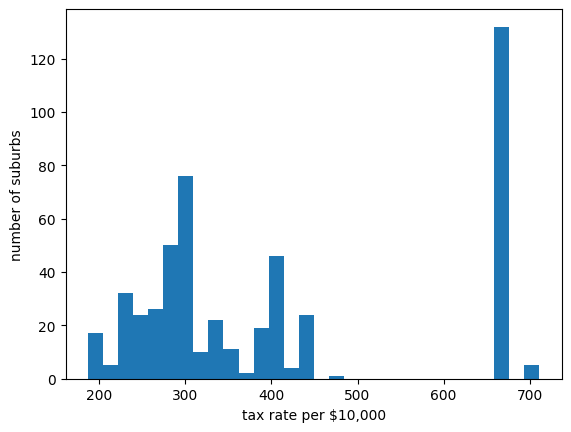

In [56]:
plt.hist(boston['tax'], bins=30)
plt.xlabel('tax rate per $10,000')
plt.ylabel('number of suburbs')
plt.show()

In [57]:
Q1 = boston['tax'].quantile(0.25)
Q3 = boston['tax'].quantile(0.75)
IQR = Q3 - Q1
boston[boston['tax']> Q3 + 1.5 * IQR].shape

(0, 14)

#### using Interquartile Range Method we can see that there is approximately 14 suburbs out of the 506 have high tax rates.

#### 6.3) pupil-teacher ratios :

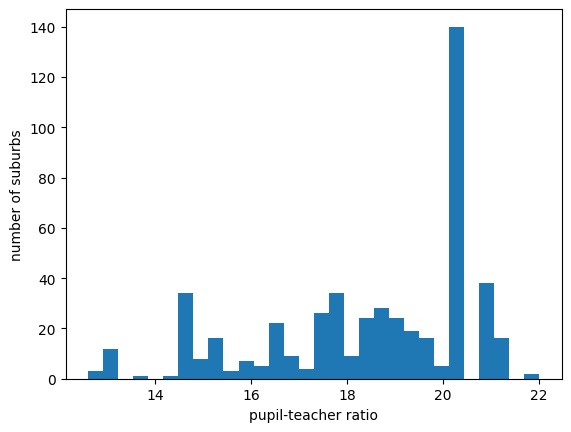

In [58]:
plt.hist(boston['ptratio'], bins=30)
plt.xlabel('pupil-teacher ratio')
plt.ylabel('number of suburbs')
plt.show()

In [59]:
Q1 = boston['ptratio'].quantile(0.25)
Q3 = boston['ptratio'].quantile(0.75)
IQR = Q3 - Q1
boston[boston['ptratio']> Q3 + 1.5 * IQR].shape

(0, 14)

#### using Interquartile Range Method we can see that there is approximately 14 suburbs out of the 506 have high pubil-teacher ratio.

### 7) Number of sububrs bounded by the Charles river :

In [61]:
boston[boston['chas']==1].shape

(35, 14)

#### 35 suburbs are bounded by the Charles river

### 8) median pupil-teacher ratio among towns : 

In [63]:
boston['ptratio'].median()

19.05

### 9) houses with the lowest median value

In [64]:
boston[boston['medv'] == boston['medv'].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [65]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### this suburbs has a very high crime rate compared to other suburbs, high indus rate (equals to 75% percentile), high pollution rate, maximum age, high TAX, high PTRATIO, and high lstat.

### 10) number of suburbs with a rm > 7 and rm > 8 :

In [72]:
print(boston[boston['rm']>7].shape)
print(boston[boston['rm']>8].shape)

(64, 14)
(13, 14)


In [74]:
boston[boston['rm']>8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


#### lower crime rates, lower indus and nox